# SMS Spam Classifier

## Introduction
This project focuses on building a machine learning model to classify SMS messages as spam or ham (non-spam). Using the SMS Spam Collection Dataset, we will explore various preprocessing techniques, extract relevant features, and implement classification algorithms to accurately detect spam messages. This classifier can help reduce unwanted messages and improve communication efficiency.

## Objective
The primary objective of this project is to:
- Preprocess the SMS data for effective feature extraction.
- Train machine learning models such as Naive Bayes and Logistic Regression.
- Evaluate the model's performance in identifying spam messages.
- Optimize the classifier to achieve high accuracy and low false-positive rates.


## Required Packages

To install the necessary packages for the project, run the following commands:


In [1]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib


## Imports

To use the necessary libraries for this project, include the following import statements at the beginning of your notebook:


In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Understanding the Data

The dataset consists of SMS messages classified as either **ham** (non-spam) or **spam**. Each message is labeled with its category, followed by the message content. The data appears in a CSV format with the following structure:

| Label | Message                                                        | ... |
|-------|----------------------------------------------------------------|-----|
| ham   | "Go until jurong point, crazy.. Available only in bugis..."   | ... |
| ham   | "Ok lar... Joking wif u oni..."                                | ... |
| spam  | "Free entry in 2 a wkly comp to win FA Cup final tkts..."     | ... |
| ham   | "U dun say so early hor... U c already then say..."            | ... |
| spam  | "WINNER!! As a valued network customer you have been..."       | ... |
| ...   | ...                                                            | ... |

### Columns
- **Label**: Indicates whether the message is **ham** (not spam) or **spam**.
- **Message**: The actual text of the SMS message.

### Insights
- The dataset contains a mixture of casual conversations and promotional messages.
- Understanding the patterns in the message content will help us effectively classify them into spam and non-spam categories.


## Step 1: Load the Data

In this step, we will load the SMS Spam Collection Dataset using the `pandas` library. 

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Step 2: Data Preprocessing

In this step, we will preprocess the data to prepare it for analysis. This includes the following tasks:

1. Removing unnecessary columns.
2. Checking for and handling missing values.
3. Normalizing the text by lowercasing and removing punctuation.



In [4]:
# Remove unnecessary columns
data = data[['v1', 'v2']]  # Retaining only relevant columns

# Rename the columns for easier access
data.columns = ['label', 'message']

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Normalize the text (lowercase)
data['message'] = data['message'].str.lower()

# Display the first few rows after preprocessing
data.head()

Missing values in each column:
 label      0
message    0
dtype: int64


,label,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


### Step 3: Exploratory Data Analysis (EDA)

In this step, we will analyze the data to understand the distribution of spam and ham messages. Specifically, we will:

1. Count the number of spam and ham messages.
2. Visualize this distribution using a bar chart.

This will give us insights into the balance between the two classes in the dataset.


Label distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


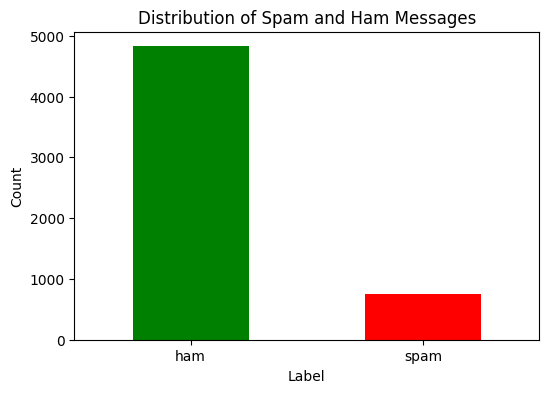

In [18]:
import matplotlib.pyplot as plt
# Count the number of spam and ham messages
label_counts = data['label'].value_counts()
print("Label distribution:\n", label_counts)

# Visualize the distribution using a bar chart

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Step 4: Feature Extraction

In this step, we will convert the text messages into numerical features that can be used by machine learning models. We will use the `CountVectorizer` from `sklearn` to transform the SMS messages into a matrix of token counts. This process is essential for training our classification model.

#### CountVectorizer

`CountVectorizer` is a feature extraction technique provided by the `sklearn` library that converts a collection of text documents into a matrix of token counts. This transformation is crucial for preparing text data for machine learning models.

##### Key Features of CountVectorizer:

1. **Tokenization**: 
   - It splits the text into individual words or tokens. By default, it uses whitespace and punctuation as delimiters.

2. **Count Representation**: 
   - For each unique token in the dataset, it counts how many times that token appears in each document (SMS message in this case). 
   - The output is a sparse matrix, where each row corresponds to a document and each column corresponds to a token.

3. **Vocabulary Creation**: 
   - It builds a vocabulary of unique words found in the dataset, which helps in converting the text into a structured numerical format.

4. **Handling of Stop Words**: 
   - You can configure `CountVectorizer` to ignore common words (stop words) that may not contribute significantly to the classification (like "the", "is", etc.).

5. **N-grams**:
   - It can also be set up to consider sequences of words (bigrams, trigrams, etc.) rather than just single words, allowing for more context in the features.

##### Example:
For example, if we have the following messages:
- "Hello world"
- "Hello from the other side"

After applying `CountVectorizer`, we would get a matrix representation like this:

|         | hello | world | from | the | other | side |
|---------|-------|-------|------|-----|-------|------|
| Message 1 | 1     | 1     | 0    | 0   | 0     | 0    |
| Message 2 | 1     | 0     | 1    | 1   | 1     | 1    |

This matrix can then be used as input for machine learning algorithms.


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the message data
X = vectorizer.fit_transform(data['message'])

# Display the shape of the resulting feature matrix
print("Shape of the feature matrix:", X.shape)

Shape of the feature matrix: (5572, 8672)


### Step 5: Split the Data

In this step, we will divide our dataset into training and testing sets. This separation is essential to evaluate the performance of our machine learning model accurately. We'll use the `train_test_split` function from `sklearn.model_selection` to achieve this.



In [14]:
from sklearn.model_selection import train_test_split
# we have deffined X before hand
y = data['label']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 4457
Testing set size: 1115


### Visualizing Training and Testing Data Distribution

In this section, we will visualize the distribution of spam and ham messages in both the training and testing datasets. This helps us understand if the datasets are balanced and whether the model will be trained effectively.

We will use a bar chart to display the counts of spam and ham messages in each dataset.


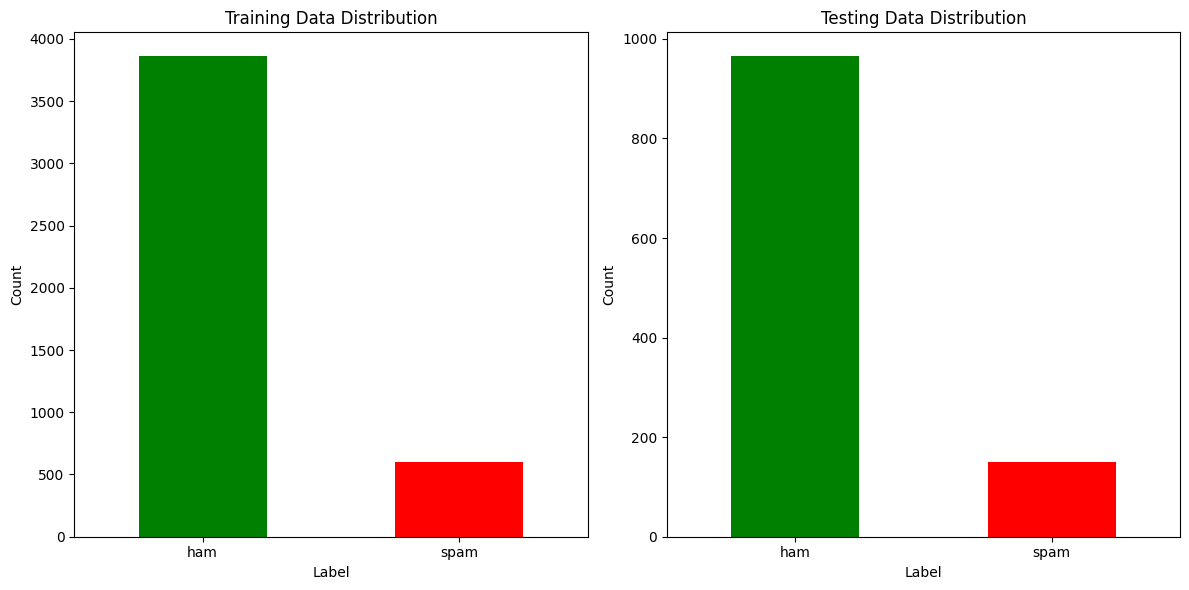

In [15]:
import matplotlib.pyplot as plt

# Count the number of spam and ham messages in the training set
train_counts = y_train.value_counts()

# Count the number of spam and ham messages in the testing set
test_counts = y_test.value_counts()

# Plotting the counts
plt.figure(figsize=(12, 6))

# Plot for training data
plt.subplot(1, 2, 1)
train_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Training Data Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot for testing data
plt.subplot(1, 2, 2)
test_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Testing Data Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Step 6: Model Selection and Training

In this section, we will train multiple machine learning models to classify SMS messages as "spam" or "ham." We will evaluate the performance of each model to determine which one works best for our dataset.

#### Models to be Trained:
1. **Naive Bayes**: A probabilistic classifier based on Bayes' theorem, particularly effective for text classification.
2. **Logistic Regression**: A linear model used for binary classification that estimates probabilities using the logistic function.
3. **Support Vector Machine (SVM)**: A powerful classifier that works well for high-dimensional spaces.
4. **Random Forest**: An ensemble learning method that builds multiple decision trees and merges them to improve classification accuracy.

We will train each model on the training dataset and evaluate their accuracy on the test dataset.


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# List of models to train
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to store the accuracy of each model
model_accuracies = {}

# Training and evaluating each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Display the accuracies of all models
print("\nModel Accuracies:")
for name, accuracy in model_accuracies.items():
    print(f"{name}: {accuracy:.4f}")

Naive Bayes Accuracy: 0.9785
Logistic Regression Accuracy: 0.9776
Support Vector Machine Accuracy: 0.9785
Random Forest Accuracy: 0.9767

Model Accuracies:
Naive Bayes: 0.9785
Logistic Regression: 0.9776
Support Vector Machine: 0.9785
Random Forest: 0.9767


### Model Accuracy Comparison

In this section, we compare the accuracies of different classification models used for spam detection. The following models were evaluated:

1. **Naive Bayes**: Achieved an accuracy of **97.85%**. This model is typically effective for text classification tasks due to its simplicity and efficiency.

2. **Logistic Regression**: Achieved an accuracy of **97.76%**. While this model is generally robust, it was slightly less accurate than the Naive Bayes and Support Vector Machine models in this instance.

3. **Support Vector Machine (SVM)**: Also achieved an accuracy of **97.85%**, matching the performance of the Naive Bayes model. SVMs are known for their effectiveness in high-dimensional spaces, making them a good choice for text classification.

4. **Random Forest**: Achieved an accuracy of **97.67%**, which is the lowest among the models tested. While Random Forests are powerful ensemble methods, they may not perform as well as simpler models for this particular dataset.

### Summary of Model Accuracies:
- **Naive Bayes**: 0.9785
- **Logistic Regression**: 0.9776
- **Support Vector Machine**: 0.9785
- **Random Forest**: 0.9767

### Conclusion
The Naive Bayes and Support Vector Machine models outperformed the other algorithms in terms of accuracy for this spam classification task. Based on this comparison, either of these models could be chosen for deployment in a real-world application. Further tuning and testing may be beneficial to improve the performance of the Logistic Regression and Random Forest models.


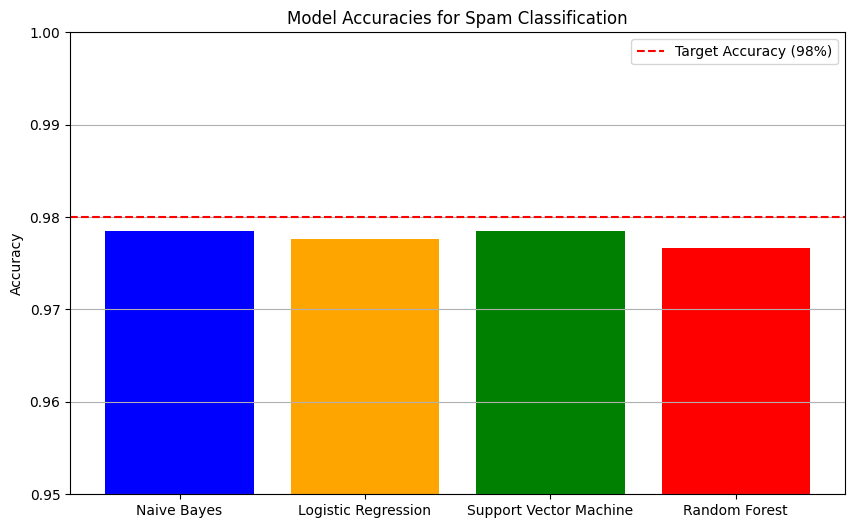

In [17]:
import matplotlib.pyplot as plt

# Model accuracies
model_names = ['Naive Bayes', 'Logistic Regression',
               'Support Vector Machine', 'Random Forest']
accuracies = [0.9785, 0.9776, 0.9785, 0.9767]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylim([0.95, 1.0])  # Limit y-axis for clarity
plt.ylabel('Accuracy')
plt.title('Model Accuracies for Spam Classification')
plt.axhline(y=0.98, color='r', linestyle='--', label='Target Accuracy (98%)')
plt.legend()
plt.grid(axis='y')
plt.show()